In [22]:
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.image as mpimg

from shapely.geometry import Polygon, MultiPolygon
import shapely

In [23]:
def get_asset_ids_list(assets):
    """
    Takes a dictionary of assets with weird ids
    as keys and returns a list of those keys
    """
    return list(assets.keys())


def get_asset_meta(assets, idx):
    """
    Return key meta data for a specific asset specified 
    by it's id number (idx)
    """
    linename = assets[idx]['asset']['name']
    path = assets[idx]['asset']['path']
    size = assets[idx]['asset']['size']
    return linename, path, size


def get_asset_regions(assets, idx):
    return assets[idx]['regions']


def make_multi_polygon(regions):
    """
    Iterates over polygon regions and
    returns a Shapely MultiPolygon object
    # ToDo: deal with straight line case. Currently not supported
    """
    polys = []
    for poly in regions:
        points = (poly['points'])
        if len(points) > 2:
            polygon = shapely.geometry.Polygon([(p['x'], p['y']) for p in points])
            polys.append(polygon)
    multi_polygons = shapely.geometry.MultiPolygon(polys)
    return multi_polygons


def make_masked_arrary(size, multi_polygons):
    """
    Returns a masked array the same dimensions of the image data
    Yielding a True inside the fault polygons and a False outside
    """
    width, height= size['height'], size['width']
    x, y = np.mgrid[:height, :width]
    coors = np.hstack((x.reshape(-1, 1), y.reshape(-1,1))) 

    masks = np.empty(width*height)
    for poly in list(multi_polygons):
        polygon = list(poly.exterior.coords)
        poly_path = Path(polygon)
        masks += poly_path.contains_points(coors)
    return masks.reshape(height, width).T


def save_mask_output(fault_mask_arr, path, linename, size):
    """
    Save the output mask as the same resolution as the input
    image. 
    """
    height, width= size['height'], size['width']
    print(width, height)
    figsize = (width/400, height/400)
    fig = plt.figure(frameon=False, figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    ax.imshow(fault_mask_arr, cmap='Greys')
    plt.savefig(path + linename[:-4] + '.png', dpi=400)
    plt.close("all")
    return

In [24]:
ls

Fault_polygon_masks.ipynb           data/
Image_slices_from_3d_seismic.ipynb  images/
LICENSE                             training_data/
README.md


In [62]:
# path of json file
input_fname = 'training_data/faults/vott-json-export/Kerry_fault_labels-export.json'

# output path
out_path = 'training_data/faults/'

In [63]:
pwd

'/Users/Evan/Documents/GitHub/seismic_fault_segmentation'

In [64]:
with open(input_fname, 'r') as f:
    dump = json.load(f)
    assets = dump['assets']

In [65]:
asset_ids = get_asset_ids_list(assets)

for idx in asset_ids:
    ln, pth, sz = get_asset_meta(assets, idx)
    print(idx, '\n\t', ln, ' '*4, sz, '\n' )
    regions = get_asset_regions(assets, idx)
    if regions:  # some images don't have any polygons
        fault_polygons = make_multi_polygon(regions)
        masked_arr = make_masked_arrary(sz, fault_polygons)
        save_mask_output(masked_arr, out_path, ln, sz)
    else:
        masked_arr = np.zeros((sz['width'], sz['height']))
        save_mask_output(masked_arr, out_path, ln, sz)
        pass

6e77ee7c1ddfe31ecdd9196ed4e1d00b 
	 section_180_2_xline.png      {'width': 750, 'height': 750} 

750 750
1c27ab0613eb85e1aaa4b7ccffc472e2 
	 section_90_6_inline.png      {'width': 750, 'height': 750} 

750 750
ea48dd87cbc8d0b1385de15863356105 
	 section_90_5_inline.png      {'width': 750, 'height': 750} 

750 750
14216a71acce6a74e37f23a31bbf5b2c 
	 section_90_4_inline.png      {'width': 750, 'height': 750} 

750 750
085b6a4ad34d023bf904e737378168ef 
	 section_90_3_inline.png      {'width': 750, 'height': 750} 

750 750
341e1c8ba2e9e70460374398e3e4a19e 
	 section_90_2_inline.png      {'width': 750, 'height': 750} 

750 750
a5101a1bd84c8053e26e0517800d31cc 
	 section_90_1_xline.png      {'width': 750, 'height': 750} 

750 750
653d3eea7d8bfa11cf54c206b6aece19 
	 section_90_1_inline.png      {'width': 750, 'height': 750} 

750 750
c093b390ba26e6a0c5c8711925565742 
	 section_80_6_inline.png      {'width': 750, 'height': 750} 

750 750
843f86e414c07c18e0049b3960473ec7 
	 section_80_5_inline.

750 750
f65b960023acc05f95f97b52bd50b8cf 
	 section_30_6_inline.png      {'width': 750, 'height': 750} 

750 750
5de6c39b74df48884769a40b3c1d2f17 
	 section_30_5_inline.png      {'width': 750, 'height': 750} 

750 750
2fa08b47e610ca80ccf70ceea7c24f87 
	 section_30_4_inline.png      {'width': 750, 'height': 750} 

750 750
80d6db790ceb01200e47d5c8b416cd1b 
	 section_30_3_inline.png      {'width': 750, 'height': 750} 

750 750
1580f3114fcb337c88935a914d5c91f2 
	 section_30_2_inline.png      {'width': 750, 'height': 750} 

750 750
cc548771019d6fd01804d539d86f5a18 
	 section_30_1_inline.png      {'width': 750, 'height': 750} 

750 750
dd53152bcafe412b132be0d700c5367f 
	 section_300_2_xline.png      {'width': 750, 'height': 750} 

750 750
0eae43709e36704eb9e8ef73b3403102 
	 section_300_1_xline.png      {'width': 750, 'height': 750} 

750 750
d2bbf9fad515b7d36392e36122a51b89 
	 section_290_2_xline.png      {'width': 750, 'height': 750} 

750 750
fd3cb7077f483e26e7324688f5f80e6c 
	 section_290

750 750
126ba404508cdbb64fa70087eb44280e 
	 section_160_1_inline.png      {'width': 750, 'height': 750} 

750 750
b69fd7dbe779b9b5d2f9f2a3d1cdcbe2 
	 section_150_6_inline.png      {'width': 750, 'height': 750} 

750 750
a8535ef4c35e87c4fb7b841bb82b201d 
	 section_150_5_inline.png      {'width': 750, 'height': 750} 

750 750
920c8c43dbead132cff7623946ba4084 
	 section_150_4_inline.png      {'width': 750, 'height': 750} 

750 750
05f878730e25749390697044ff570696 
	 section_150_3_inline.png      {'width': 750, 'height': 750} 

750 750
2aefb236146740f321a92c6e55444101 
	 section_150_2_xline.png      {'width': 750, 'height': 750} 

750 750
aead655a3e3d709b21c2dee2171bbfb1 
	 section_150_2_inline.png      {'width': 750, 'height': 750} 

750 750
4ae7a1b960abbae53cd32521b8707270 
	 section_150_1_xline.png      {'width': 750, 'height': 750} 

750 750
88c020c88ffb38f8585de5bdad37838a 
	 section_150_1_inline.png      {'width': 750, 'height': 750} 

750 750
8406c4fd7dfcc655287bbe285a2be943 
	 sect

In [66]:
pth

'file:/Users/Evan/Documents/GitHub/seismic_fault_segmentation/training_data/seismic/section_100_1_inline.png'

In [19]:
pwd

'/Users/Evan/Documents/GitHub/seismic_image_prep'

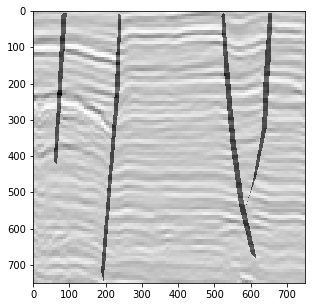

In [67]:
# QC check
file_path_seismic = 'training_data/seismic/section_30_1_inline.png'
file_path_faults = 'training_data/faults/section_30_1_inline.png'
qc_check = True
if qc_check:
    import matplotlib.image as mpimg
    img_seismic = mpimg.imread(file_path_seismic)
    img_faults = mpimg.imread(file_path_faults)
    plt.figure(figsize = (5,5))
    plt.imshow(img_seismic)
    plt.imshow(img_faults, alpha=0.5)
    #for i, poly in enumerate (fault_polygons):
    #    x,y = poly.exterior.xy
    #    plt.plot(x,y)

In [34]:
import glob

In [43]:
datafiles = glob.glob('training_data/seismic/*.png')
modelfiles = glob.glob('training_data/faults/*.png')

In [44]:
datafiles = [name.split('/')[-1] for name in datafiles]
modelfiles = [name.split('/')[-1] for name in modelfiles]

In [47]:
for d, m in zip (datafiles, modelfiles):
    #print(d,m)
    if d == m:
        pass
    else:
        print(d.split('/')[-1], '  ',  m.split('/')[-1])

section_180_2_xline.png    section_200_6_inline.png
section_200_6_inline.png    section_120_2_inline.png
section_120_2_inline.png    section_210_5_inline.png
section_210_5_inline.png    section_130_1_inline.png
section_130_1_inline.png    section_490_1_xline.png
section_490_1_xline.png    section_140_4_inline.png
section_140_4_inline.png    section_170_1_inline.png
section_170_1_inline.png    section_160_2_inline.png
section_160_2_inline.png    section_200_3_inline.png
section_200_3_inline.png    section_130_4_inline.png
section_130_4_inline.png    section_190_3_inline.png
section_190_3_inline.png    section_100_1_inline.png
section_100_1_inline.png    section_110_2_inline.png
section_110_2_inline.png    section_280_2_xline.png
section_280_2_xline.png    section_170_4_inline.png
section_170_4_inline.png    section_240_3_inline.png
section_240_3_inline.png    section_150_2_inline.png
section_150_2_inline.png    section_70_1_xline.png
section_70_1_xline.png    section_140_1_inline.png
se